<a href="https://colab.research.google.com/github/Uneedsfreedom/DataAnalyticsExamples/blob/main/ChikFilA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A nutritious fruit mix made with chopped pieces of red and green apples, mandarin orange segments, fresh strawberry slices, and blueberries, served chilled. Prepared fresh daily.

There are two parts to our case study:

Project Logistics

You should have received an email to complete a WePow video interview. If you do not see the email in your inbox, please check your spam/junk folder. You will have 7 days to complete the WePow interview which consists of a case study. I have attached the case study that you will be presenting in the WePow.

In the WePow you will be asked two questions, in which you have 5 minutes to answer each question:

Explain your approach and methodology to complete the case study

Explain your analysis and any key insights you found regarding the costs and item profitability over time

Upon completion of the WePow, please send me an email of your Report of Findings (via pdf, word, PowerPoint, etc.).

Project Details:

In preparation for your case study, please read the project details below. As a reminder, you will only have one opportunity to record your case study, so please make sure that you are prepared prior to completing it. If you have any questions, please feel free to email me (Tiarsha.betha2@accesscfa.com).

Use the Chick-fil-A Fruit cup image from the Chick-fil-A website in Appendix A below to construct assumptions about which products contribute to Fruit Cup costs.

Blend the below Bureau of Labor Statistics Producer Price Index datasets together in the way that makes the most sense to you (leverage data preparation tools such as Alteryx, Python, R or similar)

Data Sets:

Producer Price Index (PPI) Data Files: https://www.dropbox.com/sh/jilivuc251witsi/AADTTmF2rubEM9HuTWxPjjOMa?dl=0

M13 = Annual Average

There is a single file with PPI data by product type

There are multiple other files that describe the PPI data by item, time, and product groups

The ReadMe will be useful in defining the contents and structure of each dataset

What we are looking for:

Ability to learn and think dynamically, not tool expertise!! Chick-fil-A's default tools for self-service analytics are Tableau, Alteryx, and SQL, but any tools are welcome!

Note: We want to see ability to use analytics tools and Excel is not recommended. Copy and paste with Excel formulas is not a viable path.

A useful insight or two about the cost changes in the Chick-fil-A Fruit Cup over time

Show that you understand how data can be applied and how to use good judgment when there is ambiguity

Key thoughts to think through include:

Is there a definition of good vs. bad cost growth? What does this mean to the business? What should the business do in light of this information?
Note: There is no “correct” answer here
Ability to communicate analysis methods, critical assumptions, and key insights effectively and efficiently
Optional Resources:

14 day Trial Version of Alteryx: https://pages.alteryx.com/alteryx-trial.html
Trial Version of Tableau: https://www.tableau.com/products/desktop/download
Knime Analytics Platform: https://www.knime.com
The R Project for Statistical Computing: https://www.r-project.org
R Studio: https://www.rstudio.com

red and green apples, mandarin orange segments, fresh strawberry slices, and blueberries

index	group_code	item_code	item_name
26	01	110222	Strawberries
30	01	110227	Blueberries
08	01	110106	Navel oranges
18	01	110208	Granny Smith apples
19	01	110209	Rome apples
20	01	110211	Golden delicious apples
21	01	110215	Red delicious apples
22	01	110216	McIntosh apples
23	01	110219	Peaches
24	01	110220	Gala apples

#Fruit Cup costs
#WPS091503 - Paper Cups
#WPS0111 - Fresh Fruits and Melons
#WPS011101 - Citrus Fruits
#WPS011102 - Berries

In [1]:
import pandas as pd
import numpy as np
import pydrive as pyd
import matplotlib.pyplot as plt
import bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, show, curdoc
from bokeh.models import ColumnDataSource, Select, Tabs #Panels
from bokeh.layouts import row, column, gridplot
from matplotlib.widgets import Cursor
from matplotlib.widgets import Button
from matplotlib.widgets import RadioButtons
from matplotlib.widgets import CheckButtons
from matplotlib.widgets import TextBox
from matplotlib.widgets import Slider
from pathlib import Path
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#BLS Producer Price Index
fileDownloaded = drive.CreateFile({'id':'1KN0ku2LutMnj1Rx1TXEy9s6zieZxfz83'})
fileDownloaded.GetContentFile('BLS Producer Price Indexes.csv')
ppindex = pd.read_csv('BLS Producer Price Indexes.csv', sep="\t", low_memory=False,)
#.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)

#BLS Producer Price Items
fileDownloaded = drive.CreateFile({'id':'1KWvOTwvo8Z8Hwqkpa6uy2fNv0klfjASh'})
fileDownloaded.GetContentFile('BLS Producer Price Items.csv')
ppitems = pd.read_csv('BLS Producer Price Items.csv', sep="\t", low_memory=False,)

#BLS Producer Price Periods
fileDownloaded = drive.CreateFile({'id':'1KQP4TbCvBgH9KzF8tcwUICt1OAf3zKor'})
fileDownloaded.GetContentFile('BLS Producer Price Periods.csv')
ppperiods = pd.read_csv('BLS Producer Price Periods.csv', sep="\t", low_memory=False,)
#https://drive.google.com/file/d/1KQP4TbCvBgH9KzF8tcwUICt1OAf3zKor/view?usp=sharing

#BLS Producer Price Series
fileDownloaded = drive.CreateFile({'id':'1KWRr5CS362siLKshUpW-RZOX4es5ubS7'})
fileDownloaded.GetContentFile('BLS Producer Price Series.csv')
ppseries = pd.read_csv('BLS Producer Price Series.csv', sep="\t", low_memory=False,)
#ppseries.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)
#https://drive.google.com/file/d/1KWRr5CS362siLKshUpW-RZOX4es5ubS7/view?usp=sharing


#bls_csv = ("https://raw.githubusercontent.com/Uneedsfreedom/DataAnalyticsExamples/main/BLS%20Producer%20Price%20Items.txt")
  #col_names = ('group_code',	'item_code',	'item_name')
  #df = pd.read_csv(bls_csv, names=col_names, sep="\t", low_memory=False)
#df = pd.read_csv(bls_csv, sep="\t", low_memory=False)
#df.head(100)
#duplicates drop test

#df3 = ppseries.drop_duplicates(subset=['series_title'], keep='first', inplace=False, ignore_index=False)
#df3.head()

In [2]:
ppindex.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)
#Above code is to remove the whitespaces before and after,in order to help with merge/concat later
ppindex.head(10000)

,series_id,year,period,value,footnote_codes
0,WPS0111,2011,M01,125.1,NaN
1,WPS0111,2011,M02,112.5,NaN
2,WPS0111,2011,M03,111.6,NaN
3,WPS0111,2011,M04,119.4,NaN
4,WPS0111,2011,M05,108.9,NaN
...,...,...,...,...,...
9995,WPS022104,2012,M10,153.4,NaN
9996,WPS022104,2012,M11,151.2,NaN
9997,WPS022104,2012,M12,156.2,NaN
9998,WPS022104,2013,M01,156.4,NaN


In [3]:
ppperiods.head(13)

,period,period_abbr,period_name
0,M01,JAN,January
1,M02,FEB,February
2,M03,MAR,March
3,M04,APR,April
4,M05,MAY,May
5,M06,JUN,June
6,M07,JUL,July
7,M08,AUG,August
8,M09,SEP,September
9,M10,OCT,October


In [4]:
#concate Group and Item column on ppitems
ppitems['group_item_code'] = ppitems['group_code'] + ppitems['item_code']
ppitems.head(100000)


,group_code,item_code,item_name,group_item_code
0,00,000000,All commodities,00000000
1,01,-,Farm products,01-
2,01,1,"Fruits & melons, fresh/dry vegs. & nuts",011
3,01,11,Fresh fruits and melons,0111
4,01,1101,Citrus fruits,011101
...,...,...,...,...
4329,SI,HCARE3,"Health care services, private insurance patients",SIHCARE3
4330,SI,HCARE4,"Health care services, all other patients",SIHCARE4
4331,SI,STEEL1,"Steel mill products, including fabricated wire...",SISTEEL1
4332,SI,STEEL2,"Finished steel mill products, excluding fabric...",SISTEEL2


In [5]:
ppseries.head(1000)

,series_id,group_code,item_code,seasonal,base_date,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
0,WPS00000000,00,000000,S,198200,"PPI Commodity data for All commodities, season...",NaN,1967,M01,1974,M12
1,WPS01,01,-,S,198200,"PPI Commodity data for Farm products, seasonal...",NaN,1967,M01,1974,M12
2,WPS011,01,1,S,198200,PPI Commodity data for Farm products-Fruits & ...,NaN,1967,M01,1989,M12
3,WPS0111,01,11,S,198200,PPI Commodity data for Farm products-Fresh fru...,NaN,1967,M01,2019,M07
4,WPS011101,01,1101,S,198200,PPI Commodity data for Farm products-Citrus fr...,NaN,1975,M01,2019,M07
...,...,...,...,...,...,...,...,...,...,...,...
995,WPSFD413112,FD,413112,S,198200,PPI Commodity data for Final demand-Durable co...,NaN,1947,M04,2019,M07
996,WPSFD41312,FD,41312,S,198200,PPI Commodity data for Final demand-Private ca...,NaN,1947,M04,2019,M07
997,WPSFD413121,FD,413121,S,198200,PPI Commodity data for Final demand-Private ca...,NaN,1975,M01,2019,M07
998,WPSFD413122,FD,413122,S,198200,PPI Commodity data for Final demand-Private ca...,NaN,1975,M01,2019,M07


In [6]:
# Lets take the series_id, which has the following class of ingredients: WPS091503 - Paper Cups, WPS0111 - Fresh Fruits and Melons, WPS011101 - Citrus Fruits, WPS011102 - Berries
#Lets find the the price changes y/y, m/m and summarize it.

# Merge DFs Index and bring over series "period"
df_index = ppindex.merge(ppperiods, on='period', how='left')

# Strip whitespace from all string columns and values in df_index
df_index = df_index.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df_index.columns = df_index.columns.str.replace(r'\s+', '')

# Split out WPS from WPS0110 from Series_ID and concatenate group_code and item_code
df_index['group_item_code'] = df_index['series_id'].str.extract('(\d+)')
df_index = df_index.merge(ppitems, on='group_item_code', how='left')

# Filter on specific series IDs
series_ids = ["WPS091503", "WPS0111", "WPS011101", "WPS011102"]
df_filtered = df_index[df_index["series_id"].isin(series_ids)]

# Calculate percent change
df_filtered['percent_change'] = df_filtered.groupby("series_id")["value"].pct_change()

df_filtered.head(150)





<ipython-input-6-053a6ba11341>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_index.columns = df_index.columns.str.replace(r'\s+', '')
<ipython-input-6-053a6ba11341>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percent_change'] = df_filtered.groupby("series_id")["value"].pct_change()


,series_id,year,period,value,footnote_codes,period_abbr,period_name,group_item_code,group_code,item_code,item_name,percent_change
0,WPS0111,2011,M01,125.1,NaN,JAN,January,0111,01,11,Fresh fruits and melons,NaN
1,WPS0111,2011,M02,112.5,NaN,FEB,February,0111,01,11,Fresh fruits and melons,-0.100719
2,WPS0111,2011,M03,111.6,NaN,MAR,March,0111,01,11,Fresh fruits and melons,-0.008000
3,WPS0111,2011,M04,119.4,NaN,APR,April,0111,01,11,Fresh fruits and melons,0.069892
4,WPS0111,2011,M05,108.9,NaN,MAY,May,0111,01,11,Fresh fruits and melons,-0.087940
...,...,...,...,...,...,...,...,...,...,...,...,...
145,WPS011101,1997,M07,121.4,NaN,JUL,July,011101,01,1101,Citrus fruits,0.037607
146,WPS011101,1997,M08,121.4,NaN,AUG,August,011101,01,1101,Citrus fruits,0.000000
147,WPS011101,1997,M09,116.8,NaN,SEP,September,011101,01,1101,Citrus fruits,-0.037891
148,WPS011101,1997,M10,111.0,NaN,OCT,October,011101,01,1101,Citrus fruits,-0.049658


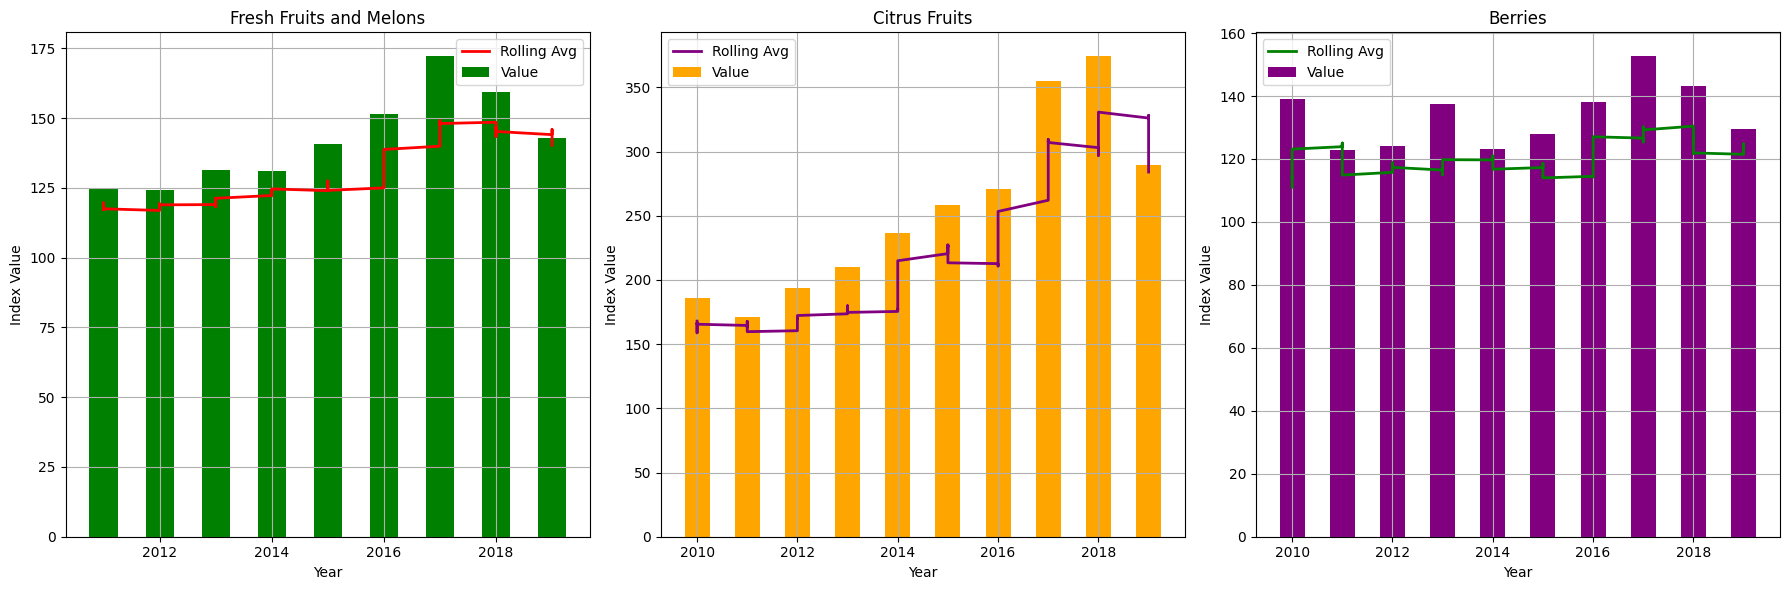

In [7]:
# Create boolean masks for each series_id
mask1 = (df_filtered['series_id'] == 'WPS0111')
mask2 = (df_filtered['series_id'] == 'WPS091503')
mask3 = (df_filtered['series_id'] == 'WPS011101')
mask4 = (df_filtered['series_id'] == 'WPS011102')

# Filter the data using the masks
data1 = df_filtered[mask1].sort_values('year')
data2 = df_filtered[mask2].sort_values('year')
data3 = df_filtered[mask3].sort_values('year')
data4 = df_filtered[mask4].sort_values('year')

# Filter the data within the desired year range
start_year = 2010
end_year = 2023
data1 = data1[(data1['year'] >= start_year) & (data1['year'] <= end_year)]
data2 = data2[(data2['year'] >= start_year) & (data2['year'] <= end_year)]
data3 = data3[(data3['year'] >= start_year) & (data3['year'] <= end_year)]
data4 = data4[(data4['year'] >= start_year) & (data4['year'] <= end_year)]

# Calculate rolling averages
window = 12  # Adjust the window size as needed
data1['rolling_avg'] = data1['value'].rolling(window=window, min_periods=3).mean()
data2['rolling_avg'] = data2['value'].rolling(window=window, min_periods=3).mean()
data3['rolling_avg'] = data3['value'].rolling(window=window, min_periods=3).mean()
data4['rolling_avg'] = data4['value'].rolling(window=window, min_periods=3).mean()

# Create separate subplots for each mask
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for mask1
axes[0].bar(data1['year'], data1['value'], width=0.5, color='Green', label='Value')
axes[0].plot(data1['year'], data1['rolling_avg'], color='Red', linewidth=2, label='Rolling Avg')
axes[0].set_title('Fresh Fruits and Melons')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Index Value')
axes[0].grid(True)
axes[0].legend()

# Plot for mask2
# axes[0, 1].bar(data2['year'], data2['value'], width=0.5, color='Red', label='Value')
# axes[0, 1].plot(data2['year'], data2['rolling_avg'], color='Blue', linewidth=2, label='Rolling Avg')
# axes[0, 1].set_title('Paper Cups')
# axes[0, 1].set_xlabel('Year')
# axes[0, 1].set_ylabel('Index Value')
# axes[0, 1].grid(True)
# axes[0, 1].legend()

# Plot for mask3
axes[1].bar(data3['year'], data3['value'], width=0.5, color='Orange', label='Value')
axes[1].plot(data3['year'], data3['rolling_avg'], color='Purple', linewidth=2, label='Rolling Avg')
axes[1].set_title('Citrus Fruits')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Index Value')
axes[1].grid(True)
axes[1].legend()

# Plot for mask4
axes[2].bar(data4['year'], data4['value'], width=0.5, color='Purple', label='Value')
axes[2].plot(data4['year'], data4['rolling_avg'], color='Green', linewidth=2, label='Rolling Avg')
axes[2].set_title('Berries')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Index Value')
axes[2].grid(True)
axes[2].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
# Create ColumnDataSource
source = ColumnDataSource(df_filtered)

# Create dropdown menu for year
year_dropdown = Select(title='Year', value=str(data['year'].unique()[0]), options=list(map(str, data['year'].unique())))

# Create dropdown menu for item_name
item_dropdown = Select(title='Item Name', value=data['item_name'].unique()[0], options=list(data['item_name'].unique()))

# Create callback for year dropdown
def year_dropdown_callback(attr, old, new):
    filtered_data = data[data['year'] == int(new)]
    source.data = ColumnDataSource.from_df(filtered_data)

# Create callback for item_name dropdown
def item_dropdown_callback(attr, old, new):
    filtered_data = data[data['item_name'] == new]
    source.data = ColumnDataSource.from_df(filtered_data)

# Add callback to year dropdown
year_dropdown.on_change('value', year_dropdown_callback)

# Add callback to item_name dropdown
item_dropdown.on_change('value', item_dropdown_callback)

# Create initial plot using the filtered data
p = figure(title='Data Plot', x_axis_label='Period', y_axis_label='Value')
p.line(x='period', y='value', source=source)

# Arrange the dropdowns and plot in a layout
layout = row(year_dropdown, item_dropdown, p)

# Determine where the visualization will be rendered
output_file('Chikfila_name.html')  # Render to static HTML, or
show(p)

from google.colab import files

files.download('Chikfila_name.html')

NameError: ignored

In [ ]:
# create a list of unique values in the filter column
filter_list = df_filtered['item_name'].unique().tolist()

# initialize the plot with all data
fig, ax = plt.subplots()
line, = ax.plot(df_filtered['year'], df_filtered['percent_change'])
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('My Data Plot')

# create the dropdown menu to filter the data
ax_filter = plt.axes([-0.2, -0.1, 0, 0.10])
Dropdown = OptionMenu(ax_filter, 'Filter', *filter_list)

# define the function to update the plot with the filtered data
def update_plot(filter_value):
    filtered_data = df_filtered[df_filtered['item_name'] == filter_value]
    line.set_xdata(filtered_data['date'])
    line.set_ydata(filtered_data['percent_change'])
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()

# connect the dropdown menu to the update function
dropdown.config(command=update_plot)

# display the plot
plt.show()


In [ ]:
# create a CSV file from the dataframe and save it to a file
filename = 'data.csv'
df_filtered.to_csv(filename, index=True)

# download the CSV file to your local workstation
from google.colab import files
files.download(filename)

# # upload the CSV file to your Google Drive
# file = drive.CreateFile({'PPIsummary': filename})
# file.Upload()

# # print the link to the file
# print('Link to file: ', file['alternateLink'])